In [1]:
%matplotlib notebook

from gamesopt.train import train, TrainConfig
from gamesopt.games import load_game, GameOptions
from gamesopt.optimizer import load_optimizer, OptimizerOptions, OptimizerType
import torch
from collections import defaultdict
import matplotlib.pyplot as plt

TrainConfig(game=GameOptions(game_type=<GameType.QUADRATIC: 'quadratic'>, quadratic_options=QuadraticGameConfig(num_samples=100, dim=10, num_players=2, bias=True, mu=0.0, ell=None, importance_sampling=False, matrix=None), kelly_auction_options=KellyAuctionConfig(bidding_cost=100, ressources=1000, marginal_utility_gains=(1.8, 2.0, 2.2, 2.4)), robust_linear_reg_options=RobustLinRegConfig(num_samples=10, dim=2, lambda_coeff=0.2, gamma_coeff=0.2), bilinear_options=BilinearGameConfig(num_samples=10, dim=2, bias=True)), optimizer=OptimizerOptions(optimizer_type=<OptimizerType.PROX_SGDA: 'Prox-SGDA'>, lr=lr=1.0e-02, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5)), prox=ProxOptions(prox_type=<ProxType.NONE: 'none'>, l1_reg=0.01, ball_radius=1.0), num_iter=2000, seed=1234, name='', save_file=None, load_file=None, precision=1.0)


<IPython.core.display.Javascript object>


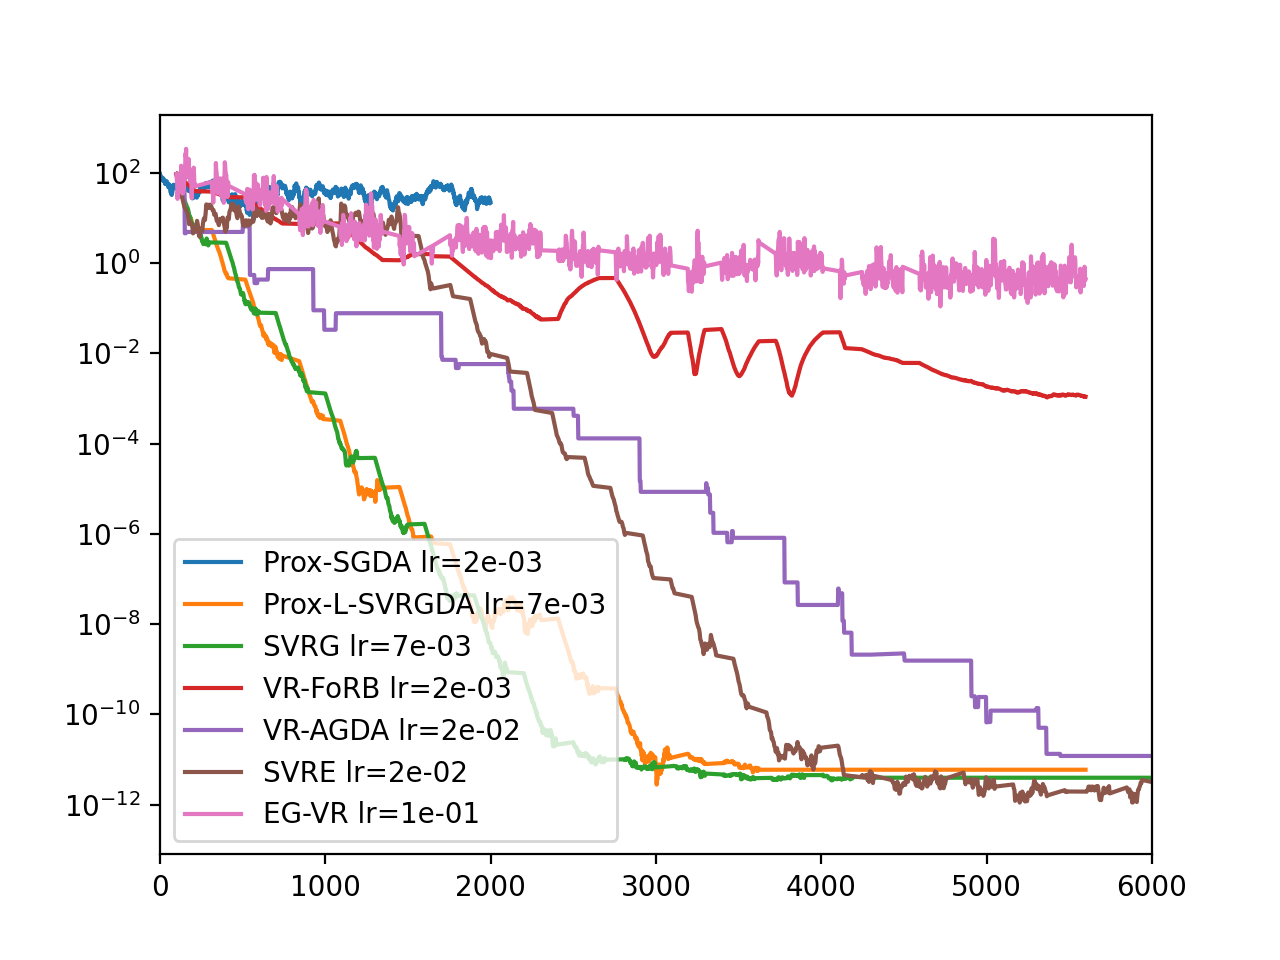

In [2]:
config = TrainConfig()
config.game.quadratic_options.num_samples = 100
config.game.quadratic_options.dim = 10
config.num_iter = 2000
config.game.quadratic_options.bias = True
print(config)

plt.figure()
plt.yscale('log')

In [8]:
config.optimizer.lr = 2e-3
config.optimizer.optimizer_type = OptimizerType.PROX_SGDA
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

Init...


In [9]:
config.optimizer.lr = 7e-3
config.optimizer.optimizer_type = OptimizerType.PROX_LSVRGDA
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.PROX_LSVRGDA: 'Prox-L-SVRGDA'>, lr=0.007, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [10]:
config.optimizer.lr = 7e-3
config.optimizer.optimizer_type = OptimizerType.SVRG
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.SVRG: 'SVRG'>, lr=0.007, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [11]:
config.optimizer.lr = 2e-3
config.optimizer.optimizer_type = OptimizerType.VRFORB
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.VRFORB: 'VR-FoRB'>, lr=0.002, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [12]:
config.optimizer.lr = 2e-2
config.optimizer.optimizer_type = OptimizerType.VRAGDA
config.optimizer.T = 1
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.VRAGDA: 'VR-AGDA'>, lr=0.02, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [13]:
config.optimizer.lr = 2e-2
config.optimizer.optimizer_type = OptimizerType.SVRE
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.SVRE: 'SVRE'>, lr=0.02, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [14]:
config.optimizer.lr = 1e-1
config.optimizer.optimizer_type = OptimizerType.EG_VR
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.EG_VR: 'EG-VR'>, lr=0.1, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [15]:
plt.legend()
plt.show()